In [16]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

In [20]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/mhpv1_examples/1.jpg'
filename = 'mhp_v1_example.jpg'
gluoncv.utils.download(url, filename, True)

85KB [00:00, 326.17KB/s]                        


'mhp_v1_example.jpg'

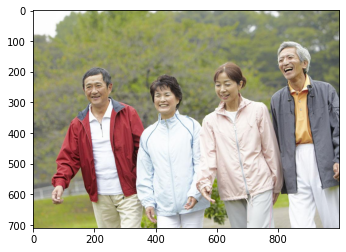

In [21]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [22]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

In [23]:
model = gluoncv.model_zoo.get_model('icnet_resnet50_mhpv1', pretrained=True)

In [24]:
resume = "/Users/haofeik/Desktop/mhp_issue/icnet_resnet50_mhpv1.params"
model.load_parameters(resume, ctx=ctx)

In [25]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [26]:
print(output.shape)

(1, 19, 712, 1000)


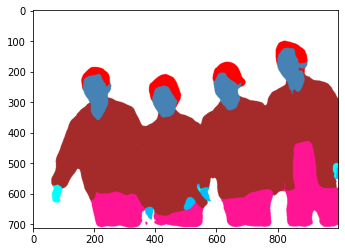

In [27]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'mhpv1')
mask.save('output.png')
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()